# Unsupervised ML

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

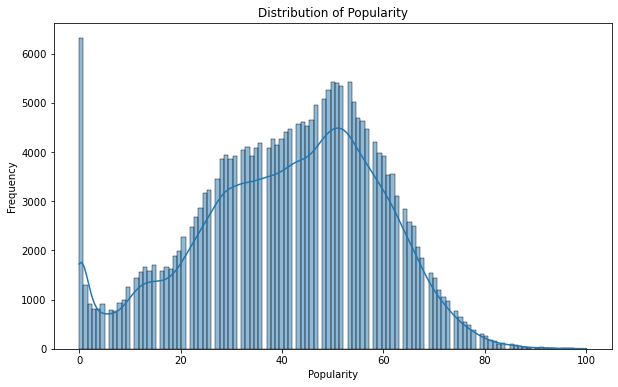

/tmp/ipykernel_684/634001693.py:35: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


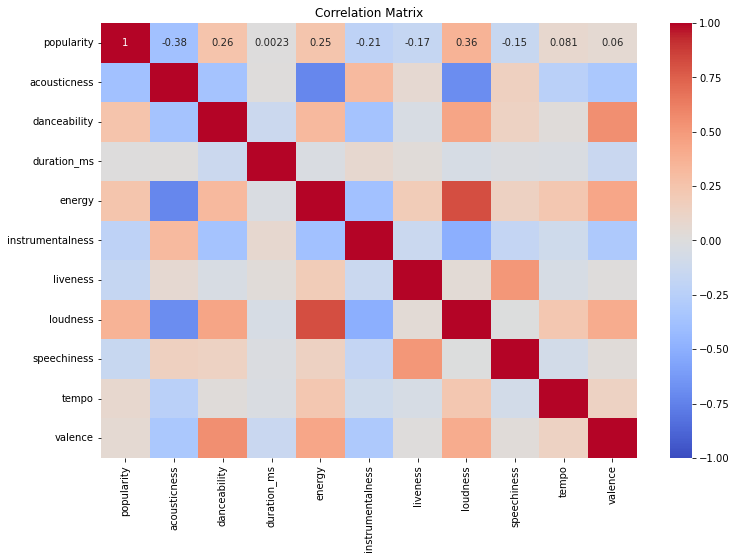

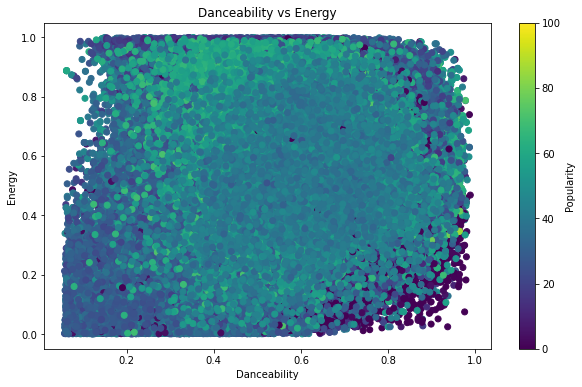

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
data = pd.read_csv('SpotifyFeatures.csv')

# Display basic information about the dataset
print(data.info())
print(data.describe())

# Scaling the features for uniformity
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))

# Create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=data.select_dtypes(include=['float64', 'int64']).columns)

# Add non-numeric features back to the scaled DataFrame
for column in data.select_dtypes(exclude=['float64', 'int64']).columns:
    scaled_data[column] = data[column]

# Plot the distribution of the Popularity Score
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# Plot heatmap to show correlations between features
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Plot scatter plot of Danceability vs. Energy
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['danceability'], data['energy'], c=data['popularity'], cmap='viridis')
plt.title('Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.colorbar(scatter, label='Popularity')
plt.show()


             genre              artist_name                    track_name  \
156547         Ska                  Sublime                     Pawn Shop   
40349   Electronic               Tim Hecker               In Death Valley   
169543      Comedy                Dane Cook                   Superpowers   
81629        Opera           Jussi Björling  Angels Guard Thee (Berceuse)   
137632      Reggae  Long Beach Dub Allstars                      Soldiers   

                      track_id  popularity  acousticness  danceability  \
156547  4DXrhZ4tF3BeVm2aLdhdKG          50       0.00839         0.637   
40349   062XFMvrtKIzICALVxEsqZ          38       0.29500         0.122   
169543  2Z4x5gw3OcDfCeuNE7Jlsl          26       0.76000         0.514   
81629   4QeOB4g7omqH5EYLgwHoPz          13       0.97200         0.216   
137632  0JuzzLmYyQrdh8Vjvnn6x4          22       0.01660         0.641   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
156547      

/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: Futur

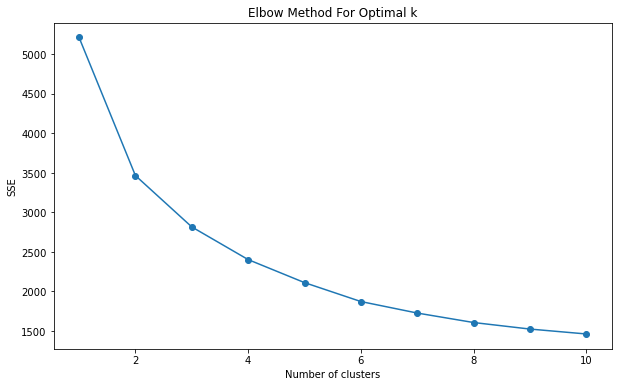

/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


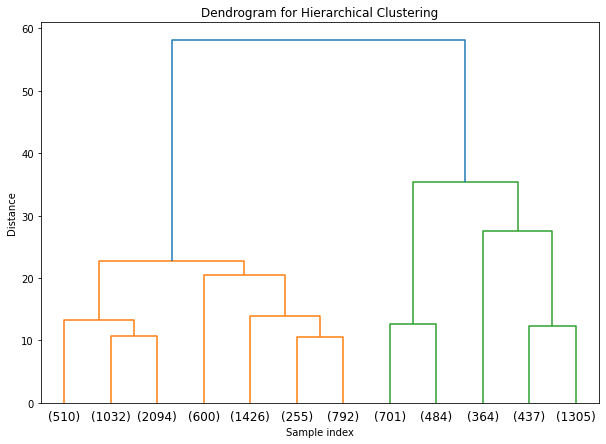

Silhouette Score for K-Means: 0.2276703400091275
Silhouette Score for DBSCAN: 0.25808141412312335


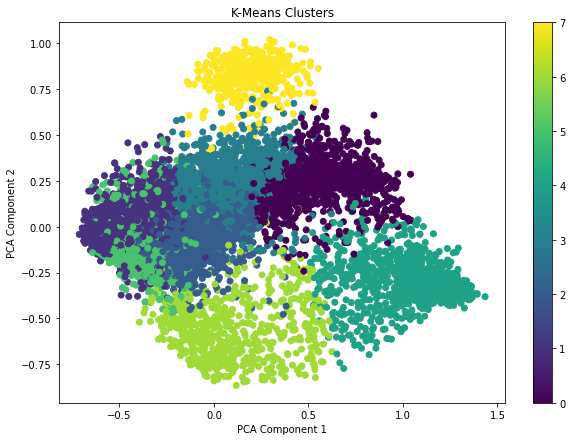

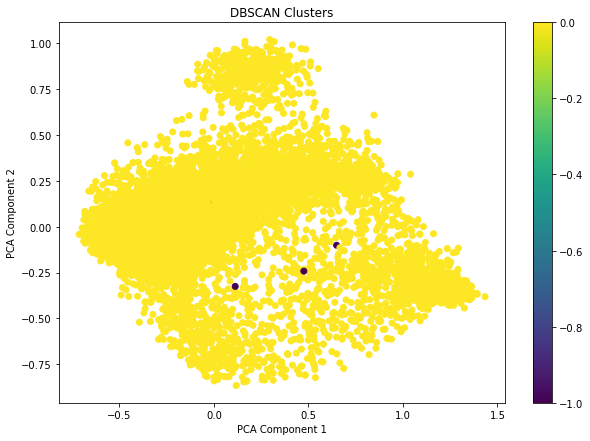

/tmp/ipykernel_684/2438056950.py:97: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = spotify_df.groupby('Cluster').mean()[features]


         danceability    energy   loudness  speechiness  acousticness  \
Cluster                                                                 
0            0.403199  0.236184 -14.686452     0.052969      0.844703   
1            0.698485  0.722122  -6.467001     0.105996      0.130033   
2            0.616406  0.556006  -7.751148     0.098713      0.174071   
3            0.646294  0.477348  -9.737661     0.106073      0.640406   
4            0.309278  0.165941 -20.699928     0.046756      0.880379   
5            0.480092  0.844905  -5.121341     0.096057      0.048149   
6            0.546090  0.647142  -9.195006     0.062861      0.174694   
7            0.559906  0.672359 -12.234571     0.886261      0.804727   

         instrumentalness  liveness   valence       tempo  
Cluster                                                    
0                0.041249  0.194842  0.221976  110.261392  
1                0.015733  0.173207  0.742829  118.817671  
2                0.017275  0.

In [3]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


# Load the data file into a DataFrame
# However the data file is too large, one can increase the sample size if running the code with a stronger cpu
# You can also comment out the sample size and read the data file directly with strong cpu
sample_size = 10000  # Adjust the sample size as needed
spotify_df = pd.read_csv('SpotifyFeatures.csv').sample(sample_size)



# Display the first few rows of the dataset
print(spotify_df.head())

# Data Cleaning and Preparation
spotify_df = spotify_df.drop_duplicates()
spotify_df = spotify_df.dropna()

# Select relevant features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']

# Scale the features
scaler = MinMaxScaler()
spotify_scaled = scaler.fit_transform(spotify_df[features])

# K-Means Clustering
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(spotify_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

# Choose the optimal number of clusters (e.g., k=8)
optimal_k = 8
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(spotify_scaled)

# Add the cluster labels to the original dataframe
spotify_df['Cluster'] = kmeans_labels

# Hierarchical Clustering
linked = linkage(spotify_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=12)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(spotify_scaled)
spotify_df['DBSCAN_Cluster'] = dbscan_labels

# Evaluate clustering performance
silhouette_kmeans = silhouette_score(spotify_scaled, kmeans_labels)
silhouette_dbscan = silhouette_score(spotify_scaled, dbscan_labels)

print(f'Silhouette Score for K-Means: {silhouette_kmeans}')
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

# Visualize the clusters using PCA
pca = PCA(n_components=2)
spotify_pca = pca.fit_transform(spotify_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(spotify_pca[:, 0], spotify_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(spotify_pca[:, 0], spotify_pca[:, 1], c=dbscan_labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

# Key Findings and Insights
cluster_summary = spotify_df.groupby('Cluster').mean()[features]
print(cluster_summary)

# Save the clustered data
spotify_df.to_csv('spotify_clustered.csv', index=False)
